In [386]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os

**Liste des constantes**

In [387]:
#Lister les images du dossier images
Lnom = os.listdir("DataSet/DataSetPostTraitement/")
imageCherchee = "IMG_2144_R.jpeg"
Lnom.remove(imageCherchee)

**Lecture d'une image** <br>
Fonction qui prend en paramètre un nom d'image et retourne le tableau de pixels de l'image

In [388]:
# Read image from file
def lecture_image(nom_image : str) -> np.ndarray:
    image = cv.imread(f"DataSet/DataSetPostTraitement/{nom_image}",0)
    return image

**Récupération de l'image** <br>
Récupération de la liste d'image et calcul de l'image moyenne de la liste

In [389]:
Limg = [lecture_image(nom_image) for nom_image in Lnom] #Récupération des images
LimgVect = [img.flatten() for img in Limg] #Vectorisation des images
M = len(Limg)

In [390]:
sumVect = np.add.reduce(LimgVect) #Somme des vecteurs
meanVect = sumVect/M #Moyenne des vecteurs

**Affichage de l'image Moyenne**

In [391]:
meanImg = meanVect.reshape(2000,2000)

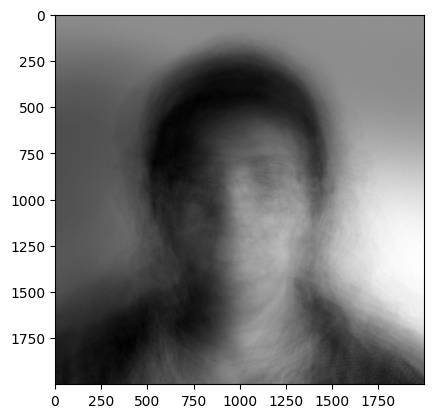

In [392]:
plt.imshow(meanImg,cmap='gray')

**Calcul des vecteurs d'écart à la moyenne pour chaque image**

In [393]:
VectEcart = {nom_image : np.subtract(LimgVect[i],meanVect) for i,nom_image in enumerate(Lnom)} #Vecteur d'écart

**Affichage des Vecteur d'écart** 

In [394]:
A = np.array([VectEcart[nom_image] for nom_image in Lnom]).T #Matrice des vecteurs d'écart
print("La matrice A est de dimension",A.shape)

La matrice A est de dimension (4000000, 59)


**Calcul des valeurs et des vecteurs propres**

In [395]:
matAAT = np.dot(A.T,A) #Matrice AAt
print("La matrice AT.A est de dimension",matAAT.shape)
print(matAAT)

La matrice AT.A est de dimension (59, 59)
[[ 6.95098104e+09  4.89604812e+09 -4.68328109e+08 ...  3.17587365e+08
   6.29667212e+08  7.96540037e+08]
 [ 4.89604812e+09  6.58570954e+09 -2.76165434e+08 ...  4.63337200e+08
   8.82580047e+08  4.58209859e+08]
 [-4.68328109e+08 -2.76165434e+08  6.25674575e+09 ... -1.36870939e+09
  -1.15071087e+09 -1.91557318e+09]
 ...
 [ 3.17587365e+08  4.63337200e+08 -1.36870939e+09 ...  7.01223185e+09
   3.48524243e+09  3.65812631e+09]
 [ 6.29667212e+08  8.82580047e+08 -1.15071087e+09 ...  3.48524243e+09
   5.88047502e+09  4.23177718e+09]
 [ 7.96540037e+08  4.58209859e+08 -1.91557318e+09 ...  3.65812631e+09
   4.23177718e+09  7.40329617e+09]]


In [396]:
Ai, Vi = np.linalg.eig(matAAT) #Calcul des valeurs propres et vecteurs propres

In [397]:
LVectPropre = [np.dot(A,vi) for vi in Vi] #Vecteurs propres
dictValVectPropre = {Ai[i] : LVectPropre[i] for i in range(len(Ai))} #Dictionnaire des valeurs propres et des vecteurs propres

In [398]:
matUi = np.array([dictValVectPropre[Ai[i]] for i in range(len(Ai))]) #Matrice des vecteurs propres

**Projection des vecteurs d'écart sur l'espace généré par les vecteurs propres**

In [399]:
dictohmegai = {nom : np.dot(matUi,VectEcart[nom]) for nom in VectEcart.keys()} #Vecteur des coordonnées des images dans le repère des vecteurs propres

**Recherche d'une image dans la base** 

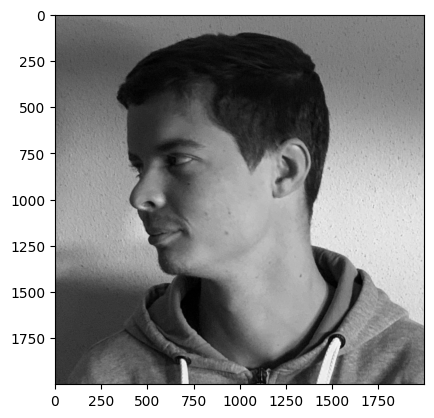

In [400]:
imgAReconnaitre = lecture_image(imageCherchee) #Chargement de l'image à reconnaitre
ecartMoyenne = np.subtract(imgAReconnaitre.flatten(),meanVect) #Vecteur d'écart entre l'image à reconnaitre et la moyenne
vecteurPoids = np.dot(matUi,ecartMoyenne) #Vecteur des coordonnées de l'image à reconnaitre dans le repère des vecteurs propres

plt.imshow(imgAReconnaitre,cmap='gray')

**Recherche d'une image dans la base et affichage des 3 images les plus proches**

L'image la plus proche a une distance de 7630185677.504617 avec l'image IMG_2148_R.jpeg


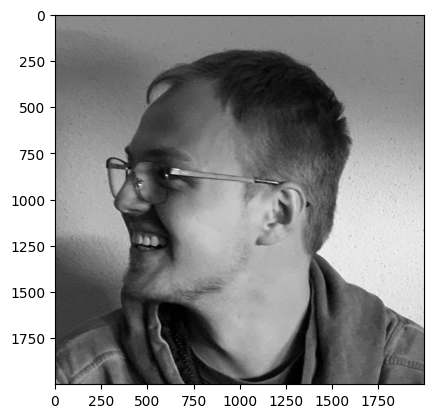

In [401]:
#Comparaison des vecteurs poids
imgPlusProche = None
distPlusfaible = sys.maxsize
imgPlusProche2 = None
distPlusfaible2 = sys.maxsize
imgPlusProche3 = None
distPlusfaible3 = sys.maxsize


for name, img in dictohmegai.items() : #Parcours des vecteurs poids des images
    dist = np.linalg.norm(img-vecteurPoids) #Calcul de la distance entre les deux vecteurs poids
    #Comparaison des distances et mise à jour des images les plus proches
    if dist < distPlusfaible : 
        distPlusfaible3 = distPlusfaible2
        imgPlusProche3 = imgPlusProche2
        distPlusfaible2 = distPlusfaible
        imgPlusProche2 = imgPlusProche
        distPlusfaible = dist 
        imgPlusProche = name
    elif dist < distPlusfaible2 : 
        distPlusfaible3 = distPlusfaible2
        imgPlusProche3 = imgPlusProche2
        distPlusfaible2 = dist 
        imgPlusProche2 = name
    elif dist < distPlusfaible3 : 
        distPlusfaible3 = dist 
        imgPlusProche3 = name

#Affichage des images les plus proches avec leurs distances
print("L'image la plus proche a une distance de",distPlusfaible,"avec l'image",imgPlusProche)
plt.imshow(lecture_image(imgPlusProche),cmap='gray')


L'image la plus proche a une distance de 10237776915.796068 avec l'image IMG_2153_R.jpeg a une distance de la première de 2607591238.2914515


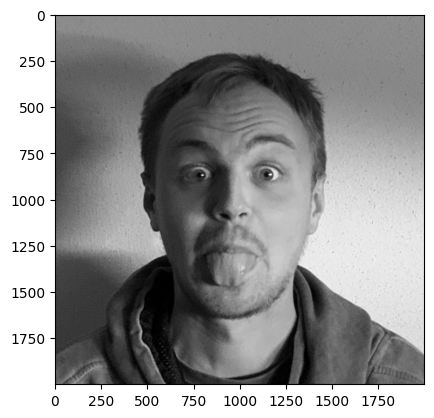

In [402]:
print("L'image la plus proche a une distance de",distPlusfaible2,"avec l'image",imgPlusProche2,"a une distance de la première de",distPlusfaible2-distPlusfaible)
plt.imshow(lecture_image(imgPlusProche2),cmap='gray')



L'image la plus proche a une distance de 11320956300.558853 avec l'image IMG_2147_R.jpeg a une distance de la deuxième de 1083179384.762785


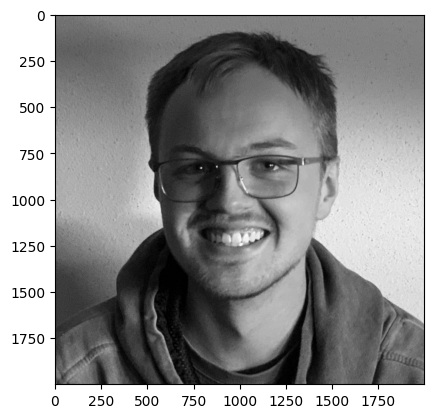

In [403]:
print("L'image la plus proche a une distance de",distPlusfaible3,"avec l'image",imgPlusProche3,"a une distance de la deuxième de",distPlusfaible3-distPlusfaible2)
plt.imshow(lecture_image(imgPlusProche3),cmap='gray')